#**Qu'est-ce que la r√©gression avec un r√©seau de neurone ?**

Un r√©seau de neurone artificiel est un mod√®le de machiune learning permettant de r√©aliser un mod√®le de r√©gression, soit une approche d'une variable suivant une ou plusieurs variables ind√©pendantes qui lui sont correl√©es.

Nous pouvons donc :
- Pr√©dire le prix de vente d'un bien suivant certains facteurs;
- Pr√©dire les coordonn√©es d'une Bounding Box d'une image;
- Pr√©dire le co√ªt d'une assurance suivant les donn√©es d√©mographique d'un personne;
- ...

##**Ce que nous allons voir**

Dans cette √©tape nous allons voir 
- L'architecture d'un mod√®le neuronal
- l'Input shape et l'Output shape :
  - x = feature
  - y = label
- Cr√©er des donn√©es et les entrainer
- Etape de mod√©lisation





In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


#Cr√©er des donn√©es et les entrainer

## Cr√©er les donn√©es

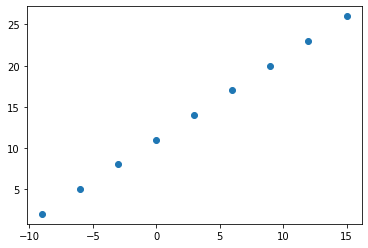

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cr√©ation de donn√©es
X = np.array([-9.0,-6.0, -3.0, 0.0, 3.0, 6.0, 9.0, 12.0, 15.0])

#Cr√©er Label
y= np.array([2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0])

#Visualisation des donn√©es
plt.scatter(X,y)


In [ ]:
y == X+11

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

Nous avons ici nos donn√©es X que nous avons mis en relation avec les donn√©es y.
- Y = x+11
- Maintenant le but serait de pr√©dire quelle serait y si X √©tait pioch√© au hasard.
ATTENTION, ici nous avons un seul X mis en relation avec y.
- Shape X = 1
- Shape y = 1

mais nous pourrions aussi avoir :
- Shape X = 3
- Shape y = 1


## Entr√©e et sortie du mod√®le

In [ ]:
# Create 
house_info = tf.constant(['Bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Dans notre cas, nous avons 3 informations qui pr√©disent un seul prix

Nous remarquons que :
- Shape house_info = 3
- Shape house_price = 1

mais aucun n'ont de dimensions sur y!

Mais revenons sur notre r√©gression lin√©aire!

In [ ]:
X[0], y[0]

(-9.0, 2.0)

- Cela signifie que si j'envoi -9, la r√©ponse sera : 2

In [ ]:
X[1], y[1]

(-6.0, 5.0)

- Cela signifie que si j'envoi -6, la r√©ponse sera : 5

Nous voyons que dans notre mod√®le linaire : 
- Une variable X pr√©dit une valeur y
- Le but est donc d'envoyer une seule info X_Test pour avoir une r√©ponse.
- La "taille", la forme de l'entr√©e d√©pendra de la forme d'une variable X[i]
- Regardons donc la taille d'un X[i]

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

Nous pouvons donc voir que la taille est "nulle".

In [ ]:
X[0].ndim

0

Nous l'avions vu plus t√¥t, la dilension est bien de 0.

Ce n'est donc pas √©trange d'avoir input_shape et output_shape = 0

In [ ]:
# Introduisons donc le tableau numpy X, dans un tenseur!
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(9,), dtype=float64, numpy=array([-9., -6., -3.,  0.,  3.,  6.,  9., 12., 15.])>,
 <tf.Tensor: shape=(9,), dtype=float64, numpy=array([ 2.,  5.,  8., 11., 14., 17., 20., 23., 26.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

Est-ce vraiment √©tonnant de voir qu'il n'y a pas e dimension?
- Nous avons vu que Tensorflow utilise numpy.
    - D√®s lors, il est normal que les caract√©ristiques de numpy soient toujours les m√™mes.

Aussi, un scalaire predit un autre scalaire.
La dimension, d'un tenseur de dimension 0 est bien un scalaire!

Maintenant, essayons de pr√©dire les choses!

## Les diff√©rentes √©tapes de mod√©lisation avec TensorFlow

1. **Cr√©er le mod√®le** - D√©finir les entr√©es, les sorties, les couches cach√©es √©ventuelles du mod√®le.
2. **Compiler le mod√®le** - D√©finir la fonction loss (c√†d, la fonction qui va r√©guler le mod√®le), l'opmisieur et la m√©trique d'√©valuation (Comment inpreter la performance du mod√®le) 
3. **Entrainer le mod√®le** - Mise en relation des donn√©es X avec les r√©ponses y, au sein du mod√®le.
4.**Evaluer le mod√®le** - v√©rifier sa pertinence

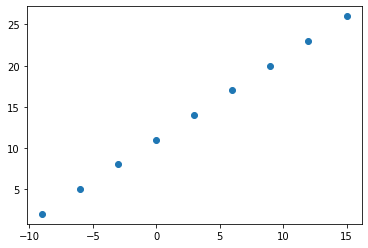

In [ ]:
plt.scatter(X,y)

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le mod√®le
model.compile(loss="mae",
              optimizer="SGD",
              metrics=["mae"])

X = tf.expand_dims(X, axis=-1)
#3. Entrainement du mod√®le
model.fit(X,y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 316ms/step - loss: 9.5604 - mae: 9.5604
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 9.4604 - mae: 9.4604
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 9.3604 - mae: 9.3604
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 9.2604 - mae: 9.2604
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 9.1604 - mae: 9.1604


Remarquons que la fonction loss est en relation parfaite avec la m√©trice d'√©valuation mae.

En efet, vu qu'il y a un seul neurone, la fonction loss est aussi son √©valuation!

In [ ]:

X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[27.757627]], dtype=float32)

Souvenez-vous
Le mod√®le √©tait du genre : y=X+11
- Ici, 17+11 = 29. 

Nous pouvons donc rendre notre mod√®le simple plus complexe en l'am√©liorant

## Am√©liorons notre mod√®le

1. **Cr√©er le mod√®le** - Rendons le plus complex. Non pas qu'avec un perceptrons mais avec un r√©seau de neurone.
2. **Compiler le modele** - Changeons la fonction d'optimisation  ou peut-√™tre le **learning rate**  de cette fonction
3. **Entrainer le mod√®le** - Essayeons plus d'**epochs** ( entrainant plus longtemps), ou donnons plus de **donn√©es* √† apprendre au mod√®le.

### Changeons juste le nombre d'√©poch.

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le mod√®le
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

X = tf.expand_dims(X, axis=-1)
#3. Entrainement du mod√®le
model.fit(X,y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 285ms/step - loss: 9.5792 - mae: 9.5792
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4792 - mae: 9.4792
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3792 - mae: 9.3792
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2792 - mae: 9.2792
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.1792 - mae: 9.1792
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 9.0792 - mae: 9.0792
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9792 - mae: 8.9792
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8792 - mae: 8.8792
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 8.7792 - mae: 8.7792
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7334 - mae: 8.7334
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 8

In [ ]:
X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[29.83366]], dtype=float32)

Nous remarquons que notre r√©ponse est pass√©e de **29.979296** √† **29.63065** Juste en changeant le nombre d'√©pochs!
- Le mod√®le simple a pu √™tre am√©lior√© rien qu'en l'entrainantb plus longtemps

### Ajoutons des neurones avant la couche de sortie (couche cach√©e)

In [ ]:
X,y

(<tf.Tensor: shape=(9,), dtype=float64, numpy=array([-9., -6., -3.,  0.,  3.,  6.,  9., 12., 15.])>,
 <tf.Tensor: shape=(9,), dtype=float64, numpy=array([ 2.,  5.,  8., 11., 14., 17., 20., 23., 26.])>)

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le mod√®le
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

X_train = tf.expand_dims(X, axis=-1)
y_train = y
#3. Entrainement du mod√®le
model.fit(X_train,y_train, epochs = 100, verbose = 0)

In [ ]:
X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[29.311071]], dtype=float32)

Nous remarquons que notre r√©ponse est pass√©e de 29.979296 √† 29.63065 Juste en changeant le nombre d'√©pochs!

En rajoutant des neurones nous obtenons **29.263811**, soit un r√©sultat meilleur!


### Changeons la fonction d'optmisation

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le mod√®le
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

X_train = tf.expand_dims(X, axis=-1)
y_train = y
#3. Entrainement du mod√®le
model.fit(X_train,y_train, epochs = 100, verbose = 0)

In [ ]:
X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[24.388887]], dtype=float32)

Et c'est l√† que nous voyons que nous sommes pas bon!

En effet , le learning rate de base de Adam est de 0,001.
- Il est peut-√™tre trop petit, nous allons l'agrandir! (tendre vers 0)

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le mod√®le
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

X_train = tf.expand_dims(X, axis=-1)
y_train = y
#3. Entrainement du mod√®le
model.fit(X_train,y_train, epochs = 100, verbose = 0)

In [ ]:
X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[28.506893]], dtype=float32)

Et biiiim, nous tendons vers les **29** que nous attendons tous!

### Que conclure ?

Nous pouvons en conclure que
- Un mod√®le simple donne une r√©ponse int√©ressante mais pas assez
- L'entrainer sur plus de donn√©es ou plus longtemps peut avoir une importance sur la r√©ponse du mod√®le
- La fonction d'optimisation agit sur la fa√ßon d'interpr√©tger le fonctionnement du mod√®le
 - Choisi sa bonne fonction √† du sens!
- Ajouter des neurons rend le probleme plus complex, mais plus sensible!

## Evaluons notre mod√®le

Ce que nous avons fait pr√©c√©dement est :
1. Construire le mod√®le;
2. Compiler le mod√®le;
3. Entrainer le mod√®le;
4. Tester le mod√®le;
5. Modifier le mod√®le;
6. Entrainer le mod√®le;
7. Tester le mod√®le;
8. Modifier le mod√®le;
9. Entrainer le mod√®le;
....
Je crois que vous avez compris.

Et ce jusqu'√† ce que le mod√®le de r√©seau de neurone atteigne une valeur qui nous convie.



### Visualiser

Quand on parle d'√©valuation, il faut que vous puissier visualier les choses.

Visualiser signifie
1. **Visualiser les donn√©es** : Quelle sont-elles? Avec quoi je travaille ?
2. **Visualiser le mod√®le** : A quoi ressemble-t-il?
3. **Visualiser l'entraineement** : Et sa r√©ponse, ses metrics.
4. **Visualiser la pr√©diction** pour permettre ainsi un ajustement √©ventuel.

In [ ]:
X = tf.range(-102,102,3)
y = X+11
X, y

(<tf.Tensor: shape=(68,), dtype=int32, numpy=
 array([-102,  -99,  -96,  -93,  -90,  -87,  -84,  -81,  -78,  -75,  -72,
         -69,  -66,  -63,  -60,  -57,  -54,  -51,  -48,  -45,  -42,  -39,
         -36,  -33,  -30,  -27,  -24,  -21,  -18,  -15,  -12,   -9,   -6,
          -3,    0,    3,    6,    9,   12,   15,   18,   21,   24,   27,
          30,   33,   36,   39,   42,   45,   48,   51,   54,   57,   60,
          63,   66,   69,   72,   75,   78,   81,   84,   87,   90,   93,
          96,   99], dtype=int32)>,
 <tf.Tensor: shape=(68,), dtype=int32, numpy=
 array([-91, -88, -85, -82, -79, -76, -73, -70, -67, -64, -61, -58, -55,
        -52, -49, -46, -43, -40, -37, -34, -31, -28, -25, -22, -19, -16,
        -13, -10,  -7,  -4,  -1,   2,   5,   8,  11,  14,  17,  20,  23,
         26,  29,  32,  35,  38,  41,  44,  47,  50,  53,  56,  59,  62,
         65,  68,  71,  74,  77,  80,  83,  86,  89,  92,  95,  98, 101,
        104, 107, 110], dtype=int32)>)

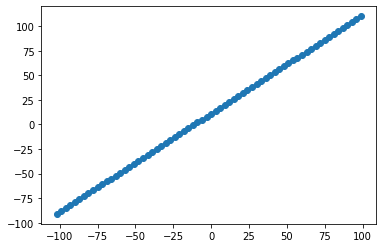

In [ ]:
plt.scatter(X,y)

### Les trois datasets

Quand nous parlons des trois datasets, nous avons 
1. **La Training Set** : Correspondant √† 70-80% des donn√©es environs
2. **La Validation Set** : Correspondant au 10-15% des donn√©es suivantes. 
3. **Le Test Set** : Correspondantaux donn√©es √† tester. Ceci correspond √† 10-15% des donn√©es totales.

**ATTENTION** : les donn√©es contenues dans l'√©valuation et le test ne peuvent pas √™tre identique aux training set!

On n'√©value ni ne test un mod√®le sur les donn√©es d'entrainement!

In [ ]:
len(X)

68

In [ ]:
#Splittons les datas en Train et Test
X_Train = X[:54]
X_Test = X[54:]

y_Train = y[:54]
y_Test = y[54:]

len(X_Train), len(X_Test),len(y_Train), len(y_Test)

(54, 14, 54, 14)

### Visualisation les donn√©es d'entrainement et de test


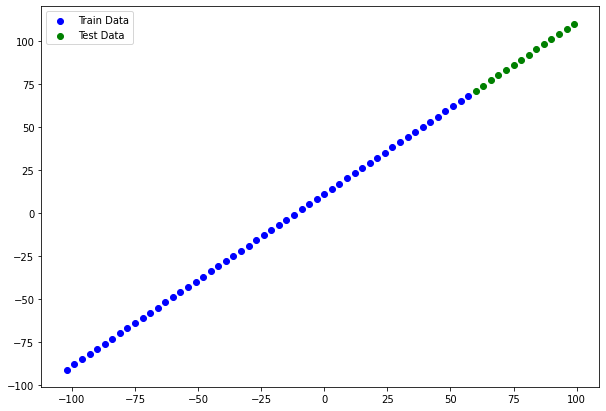

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_Train, y_Train, c='b', label='Train Data')
plt.scatter(X_Test, y_Test, c='g', label='Test Data')
plt.legend(loc='best')

Construisons donc le mod√®le sur les donn√©es d'entrainement.

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le mod√®le
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

X_train = tf.expand_dims(X_Train, axis=-1)
y_train = y_Train
#3. Entrainement du mod√®le
#model.fit(X_train,y_train, epochs = 100, verbose = 1)

### Visualisons le mod√®le

In [ ]:
model.summary()

ValueError: ignored

**ATTENTION** - Impossible de visualiser le mod√®le car le lod√®le ne sait pas combien il y de donn√©es d'entr√©es.

Pour les connaitre rapellons-nous 
- Une donn√©es X pr√©dit une donn√©e y
nous pouvons dire que :

La donn√©e d'entr√©e est √©gale √† 1

Relan√ßons le modele

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))

#Etape 2 : Compiler le mod√®le
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

X_train = tf.expand_dims(X_Train, axis=-1)
y_train = y_Train
#3. Entrainement du mod√®le
#model.fit(X_train,y_train, epochs = 100, verbose = 1)

In [ ]:
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Que voyons-nous?
1. **Total params** : nombre de parametres des neurones. (Poids et biais des neurones)
2. **Trainable params** : nombre de param√®tres entrainables du mod√®le.
3. **Non-trainable params** : nombre de param√®tres impossible √† entrainer dans le mod√®le. On retrouve ces param√®tres typiquement dans le **transfert learning**

In [ ]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

### Visualiser son mod√®le

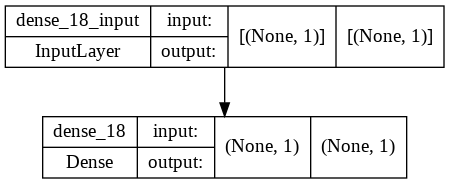

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

### Nommer son mod√®le

Si on construit son mod√®le, nous pouvons tr√®s bien nommer son mod√®le et ainsi le retrouver plus facilement.

- L'argument est "Name" dans la construction du mod√®le

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


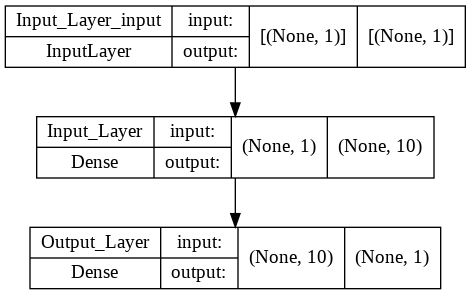

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model = tf.keras.Sequential(name = "model_1")
model.add(tf.keras.layers.Dense(10, input_shape=[1], name = "Input_Layer"))
model.add(tf.keras.layers.Dense(1, name = "Output_Layer"))

#Etape 2 : Compiler le mod√®le
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr = 0.01),
              metrics=["mae"])

X_train = tf.expand_dims(X_Train, axis=-1)
y_train = y_Train

#3. Visualisation des parametres du mod√®le
model.summary()
#4. Entrainement du mod√®le
model.fit(X_Train,y_Train, epochs = 100, verbose = 0)

#5 Visualisation du mod√®le
plot_model(model = model, show_shapes = True)

Au dessus, nous pouvons voir : **Model** avec le nom que nous lui avons donn√©.

Aussi, chacune des couches peut √™tre renomm√©e.

### Visualiser la pr√©diction du mod√®le

**ATTENTION**, il faut bien distinguer `y_test`de `y_pred``.
En effet, nous avons d√©fini `y_test``pr√©c√©dement.

`y_pred`servira d√®s lors √† voir si le mod√®le arrive √† retrouver les donn√©es de `y_test`

In [ ]:
y_pred = model.predict(X_Test)
y_pred

array([[ 69.92369 ],
       [ 72.85331 ],
       [ 75.78292 ],
       [ 78.71254 ],
       [ 81.642166],
       [ 84.571785],
       [ 87.50139 ],
       [ 90.431015],
       [ 93.36064 ],
       [ 96.29027 ],
       [ 99.21988 ],
       [102.14949 ],
       [105.079094],
       [108.00873 ]], dtype=float32)

- `y_pred` est donc la r√©ponse du mod√®le pour X_Test.
- Si tout va bien ``y_pred``et `y_test` devront √™tre proche de l'autre

In [ ]:
y_Test

<tf.Tensor: shape=(14,), dtype=int32, numpy=
array([ 71,  74,  77,  80,  83,  86,  89,  92,  95,  98, 101, 104, 107,
       110], dtype=int32)>

In [ ]:
len(y_Test), len(y_pred)

(14, 14)

In [ ]:
#visualisons les donn√©es
def Visualisation_data(train_data = X_Train, train_label = y_Train, test_data = X_Test, test_label = y_Test, pred_label = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(X_Train,y_Train, c='b', label = 'Train Data')
  plt.scatter(X_Test,y_Test, c='g', label = 'Test Data')
  plt.scatter(X_Test,y_pred, c='r', label = 'Pred Data')

  plt.legend(loc='best')


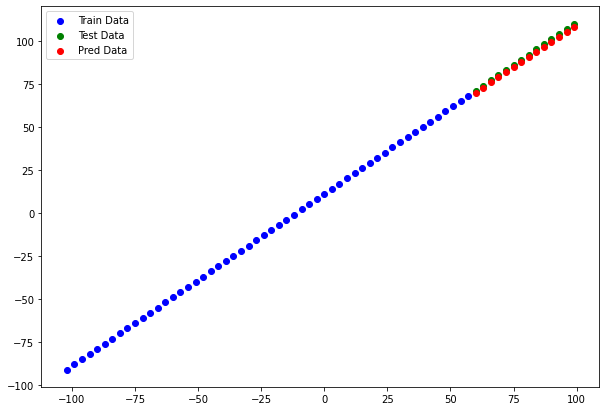

In [ ]:
Visualisation_data()

La **prediction** n'est pas si mal !

### Evaluons notre mod√®le avec la m√©tric d'√©valuation

Les m√©triques d'√©valuations peuvent donner des r√©ponses diff√©rentes en fonction de ce que l'on cherche 
- **MAE** - Mean Absolue Error
- **MSE** - Mean Squared Error
- **RMSE** - Root Mean Squared Error
- **Il en existe bien d'autres!**

In [ ]:
#Evaluons le mod√®le sur les donn√©es de Test
model.evaluate(X_Test, y_Test)

1/1 [==============================] - 0s 99ms/step - loss: 1.5338 - mae: 1.5338


[1.5337905883789062, 1.5337905883789062]

In [ ]:
# Calculons le MAE sur les donn√©es de prediction!
mae = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = y_pred)
mae

<tf.Tensor: shape=(14,), dtype=float32, numpy=
array([20.57631  , 17.91145  , 15.655057 , 13.80712  , 12.367643 ,
       11.336633 , 10.7140875, 10.5      , 10.694377 , 11.297219 ,
       12.308519 , 13.72828  , 15.556496 , 17.793196 ], dtype=float32)>

Nous remarquons que les diff√©rences sont grande, hors, nous avons vu dans le graph ci-avant que les diff√©rences √©taient faible.
- Il y a quelque chose qui ne va pas!

In [ ]:
y_Test.shape, y_pred.shape

(TensorShape([14]), (14, 1))

In [ ]:
np.ndim(y_Test), np.ndim(y_pred)

(1, 2)

**ATTENTION AUX FORMES DES MATRICES!!!**
- y_Test est un tenseur
- y_pred est un tableau numpy...de dimension 2

Il faudra donc les mettre dans les dimensions et forme identiques.

In [ ]:
#tf.squeeze() permet de r√©duire la dimension de 1 de ce qu'on lui rentre 
y_pred = tf.squeeze(y_pred)

In [ ]:
y_Test.shape, y_pred.shape

(TensorShape([14]), TensorShape([14]))

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.5337917>

Le **mae** est donc de **1.7371722**, ce qui est un bon score

In [ ]:
mse = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.4330127>

Le **mse** est donc de **3.11594652**, ce qui est un bon score.

Nous voyons que les mse et mae sont diff√©rentes, ce qui est normal.

En effet, les m√©triques sont construites de fa√ßons diff√©rentes et ne signifient pas la m√™me chose!

#Complexifions le mod√®le petit √† petit

In [ ]:
#importons les donn√©es
X = tf.range(-102,102,3)
y = X+11

#Splittons les datas en Train et Test
X_Train = X[:54]
X_Test = X[54:]

y_Train = y[:54]
y_Test = y[54:]

### Model une couche, 100 epochs

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Output_Layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


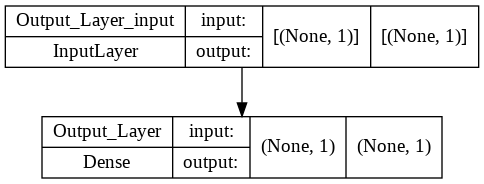

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model_1 = tf.keras.Sequential(name = "model_1")
model_1.add(tf.keras.layers.Dense(1, input_shape = [1], name = "Output_Layer"))

#Etape 2 : Compiler le mod√®le
model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

X_train = tf.expand_dims(X_Train, axis=-1)
y_train = y_Train

#3. Visualisation des parametres du mod√®le
model_1.summary()
#4. Entrainement du mod√®le
model_1.fit(X_Train,y_Train, epochs = 100, verbose = 0)

#5 Visualisation du mod√®le
plot_model(model = model_1, show_shapes = True)

In [ ]:
y_pred_1 = model_1.predict(X_Test)

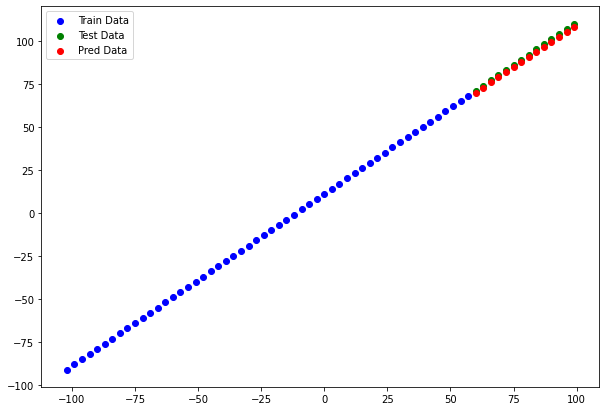

In [ ]:
Visualisation_data(pred_label = y_pred_1)

C'est sympa, mais on voit que le mod√®le d√©vie!. On pourrait l'am√©liorer

In [ ]:
mae_1 = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred =tf.squeeze(y_pred_1))
mse_1 = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.08491>,
 <tf.Tensor: shape=(), dtype=float32, numpy=447.01743>)

## Complexifions le modele

### 100 epochs et 2 couches neuronales

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


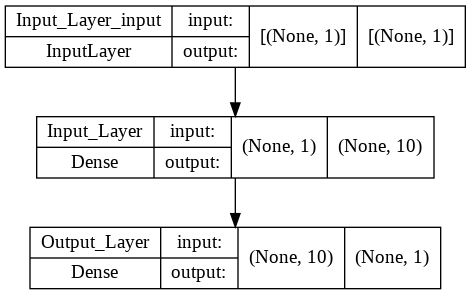

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model_2 = tf.keras.Sequential(name = "model_2")
model_2.add(tf.keras.layers.Dense(10, input_shape = [1], name = "Input_Layer"))
model_2.add(tf.keras.layers.Dense(1, name = "Output_Layer"))

#Etape 2 : Compiler le mod√®le
model_2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

y_train = y_Train

#3. Visualisation des parametres du mod√®le
model_2.summary()
#4. Entrainement du mod√®le
model_2.fit(X_Train,y_Train, epochs = 100, verbose = 0)

#5 Visualisation du mod√®le
plot_model(model = model_2, show_shapes = True)

In [ ]:
y_pred_2 = model_2.predict(X_Test)

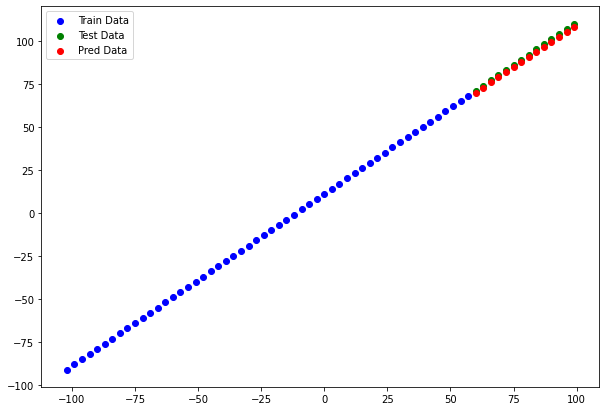

In [ ]:
Visualisation_data(pred_label = y_pred_2)

In [ ]:
mae_2 = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_2))
mse_2 = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=19.323837>,
 <tf.Tensor: shape=(), dtype=float32, numpy=375.45013>)

### Model 2 couches et 500 epochs

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


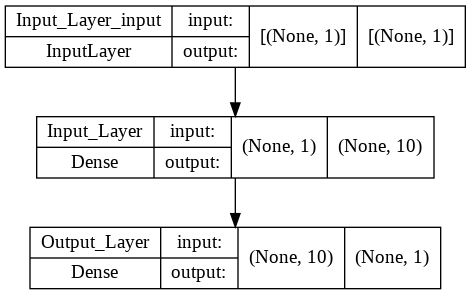

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model_3 = tf.keras.Sequential(name = "model_3")
model_3.add(tf.keras.layers.Dense(10, input_shape = [1], name = "Input_Layer"))
model_3.add(tf.keras.layers.Dense(1, name = "Output_Layer"))

#Etape 2 : Compiler le mod√®le
model_3.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])


#3. Visualisation des parametres du mod√®le
model_3.summary()
#4. Entrainement du mod√®le
model_3.fit(X_Train,y_Train, epochs = 500, verbose = 0)

#5 Visualisation du mod√®le
plot_model(model = model_3, show_shapes = True)

In [ ]:
y_pred_3 = model_3.predict(X_Test)

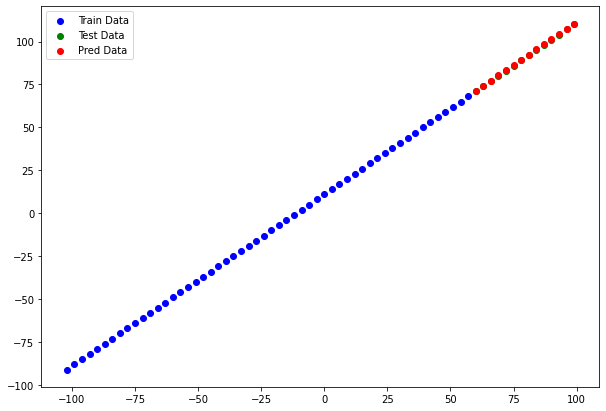

In [ ]:
Visualisation_data(pred_label = y_pred_3)

In [ ]:
mae_3 = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_3))
mse_3 = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=8.985845>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.18141>)

### Model : Couche de 50 neurone et Epoch de 500

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 50)                100       
                                                                 
 Output_Layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


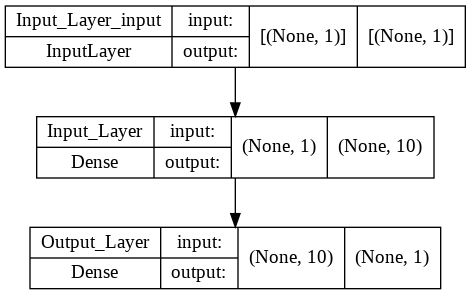

In [ ]:
# Etape 1 : Cr√©ation du mod√®le
model_4 = tf.keras.Sequential(name = "model_4")
model_4.add(tf.keras.layers.Dense(50, input_shape = [1], name = "Input_Layer"))
model_4.add(tf.keras.layers.Dense(1, name = "Output_Layer"))

#Etape 2 : Compiler le mod√®le
model_4.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])


#3. Visualisation des parametres du mod√®le
model_4.summary()
#4. Entrainement du mod√®le
model_4.fit(X_Train,y_Train, epochs = 500, verbose = 0)

#5 Visualisation du mod√®le
plot_model(model = model_3, show_shapes = True)

In [ ]:
y_pred_4 = model_4.predict(X_Test)

In [ ]:
mae_4 = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_4))
mse_4 = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_4))
mae_4, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.09363447>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.18141>)

### Comparaison des r√©sultats

Maintenant que nous avions test√© plusieurs mod√®les, il faut pouvoir les comparer intelligement.

üîë **Note** : Toujours commencer avec des mod√®les simples. Ce n'est ensuite qu'on commencera par complexifier le mod√®le

In [ ]:
import pandas as pd
model_results = [
    ["model 1", mae_1, mse_1],
    ["model 2", mae_2, mse_2],
    ["model 3", mae_3, mse_3],
    ["model 4", mae_4, mse_4]]

Results = pd.DataFrame(model_results, columns=['Model', 'MAE', 'MSE'])
Results

Model                                             MAE  \
0  model 1    tf.Tensor(21.08491, shape=(), dtype=float32)   
1  model 2   tf.Tensor(19.323837, shape=(), dtype=float32)   
2  model 3    tf.Tensor(8.985845, shape=(), dtype=float32)   
3  model 4  tf.Tensor(0.09363447, shape=(), dtype=float32)   

                                               MSE  
0    tf.Tensor(447.01743, shape=(), dtype=float32)  
1    tf.Tensor(375.45013, shape=(), dtype=float32)  
2     tf.Tensor(81.18141, shape=(), dtype=float32)  
3  tf.Tensor(0.008997126, shape=(), dtype=float32)

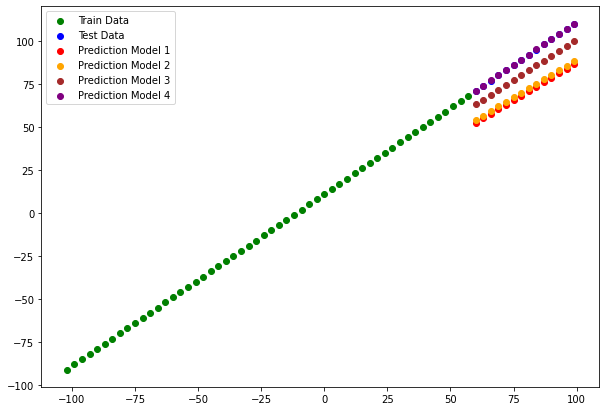

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_Train, y_Train, c = 'g', label = 'Train Data')
plt.scatter(X_Test, y_Test, c = 'b', label = 'Test Data')
plt.scatter(X_Test, y_pred_1, c = 'red', label = 'Prediction Model 1')
plt.scatter(X_Test, y_pred_2, c = 'orange', label = 'Prediction Model 2')
plt.scatter(X_Test, y_pred_3, c = 'brown', label = 'Prediction Model 3')
plt.scatter(X_Test, y_pred_4, c = 'purple', label = 'Prediction Model 4')
plt.legend(loc='best')

üîë **Remarque** - Nous pouvons voir clairement que l'√©volution des facteurs du mod√®le influence le r√©sultat

üèÖ Le **model 4** est clairement le meilleur.


# Sauvegarder et charger son modele

## Sauvegarder le mod√®le

Sauvegarder son modele permet de pouvoir l'utliser quelque part.

En effet, que ce soit un mod√®le √† partager ou un mod√®le √† envoyer dans une application.

Si vous n'enregistrez pas votre mod√®le, il ne servira √† rien.

Il existe deux m√©thode d'enregistrement de votre mod√®le :
- Le format MODELE `.model`, mod√®le sauv√© par d√©faut par Tensorflow
- Le HDF File. `.hdf`


### Le format Model

In [ ]:
model_4.save("Model_Regression_lin√©aire_simple_SavedModel")

### Le format HDF

In [ ]:
model_4.save("Model_Regression_lin√©aire_simple_HDF.h5")

**O√π se trouvent les mod√®les enregistr√©s ?**

Ils sont dans collab o√π dans le dossier que vous avez donn√©.

Dans collab, nous les trouverons ici :

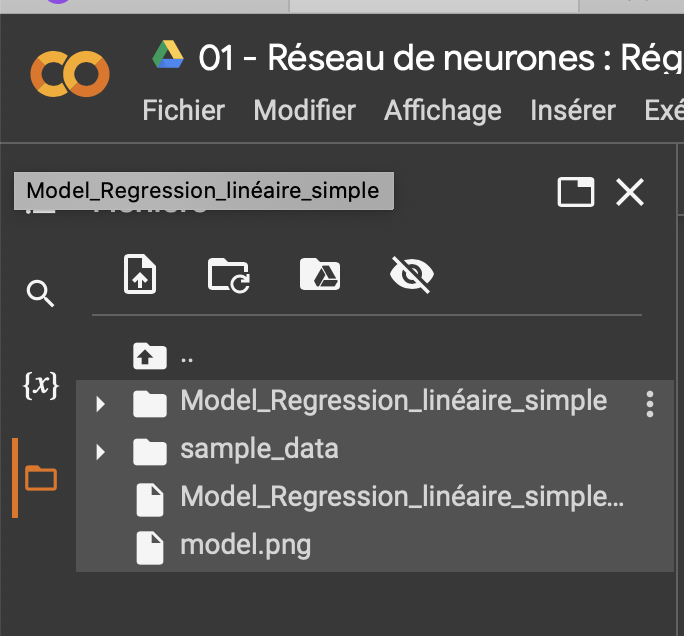

## Charger son mod√®le

In [ ]:
loaded_savedformat_model = tf.keras.models.load_model("/content/Model_Regression_lin√©aire_simple_SavedModel")
loaded_hdf_model = tf.keras.models.load_model("content/Model_Regression_lin√©aire_simple_HDF.h5")

OSError: ignored